In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('default_of_credit_card_clients.csv')

In [3]:
import numpy as np

In [4]:
np.random.seed(seed=24)


In [5]:
random_integers = np.random.randint(low=1,high=5,size=100)


In [6]:
is_equal_to_3 = random_integers == 3


In [7]:
is_equal_to_3[:5]


array([ True, False, False, False, False])

In [8]:
sum(is_equal_to_3)


22

In [9]:
random_integers[is_equal_to_3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [10]:
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2
dupe_mask[0:5]

f0bb9e5a-eb11    True
527c11ea-113e    True
5ce60722-dbd1    True
06f377a6-ba7e    True
20b16b21-8b23    True
Name: ID, dtype: bool

In [11]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [12]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4954,527c11ea-113e,340000,1,1,2,35,Not available,-1,-1,-1,...,7569,797,1211,2873,0,7591,799,1214,18309,0
5054,527c11ea-113e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19530,f0bb9e5a-eb11,100000,2,2,2,34,-1,-1,-1,-1,...,1028,0,0,1831,163,1028,0,0,0,0
19630,f0bb9e5a-eb11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21205,5ce60722-dbd1,150000,1,2,1,40,0,0,0,0,...,28265,25402,21514,35749,3016,1201,601,2002,1020,0
21305,5ce60722-dbd1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_zero_mask = df == 0


In [14]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)


0

In [15]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()


In [16]:
df_clean_1['ID'].nunique()


29687

In [17]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [18]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()


In [19]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26979 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26979 non-null int64
PAY_2    26979 non-null int64
dtypes: int64(2)
memory usage: 632.3 KB


In [20]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
0      326
5      245
4      115
6       43
Name: EDUCATION, dtype: int64

In [21]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      729
Name: EDUCATION, dtype: int64

In [22]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
0      363
3      286
Name: MARRIAGE, dtype: int64

In [23]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      649
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level:ordinal encoding')

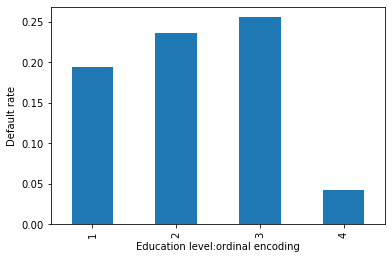

In [24]:
df_clean_2.groupby("EDUCATION").agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel("Default rate")
plt.xlabel("Education level:ordinal encoding")

In [25]:
df_clean_2['EDUCATION_CAT'] = 'none'


In [26]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [27]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [28]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [29]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [30]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)
df_with_ohe.to_csv('cleaned_data.csv', index=False)


In [31]:
df=pd.read_csv("cleaned_data.csv")

In [32]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [33]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000
mean,-0.017569,-0.131806,-0.165721,-0.222395,-0.266615,-0.290152
std,1.120173,1.191708,1.192280,1.161310,1.125481,1.143929
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [34]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13402
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

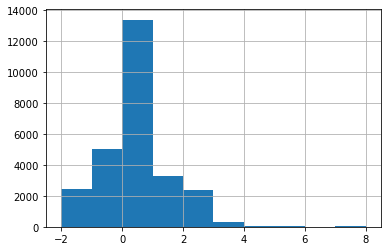

In [35]:
df[pay_feats[0]].hist()

Text(0, 0.5, 'Number of accounts')

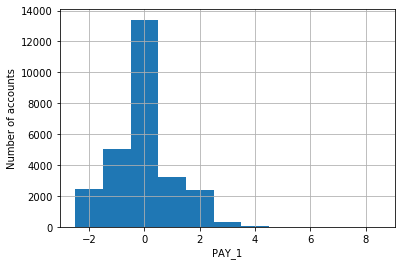

In [36]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a59ff6dd0>,
      dtype=object)

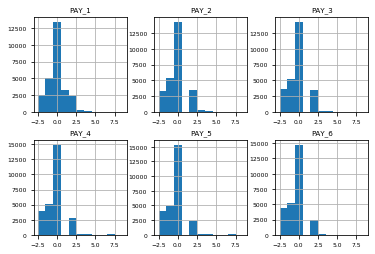

In [37]:
mpl.rcParams['font.size']=6
df[pay_feats].hist(bins=pay_1_bins,layout=(2,3))